In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("dataAirline.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# cek duplikasi
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [ ]:
# missing values calculation
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# data cleansing
# Menghapus duplikasi
data.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
 # Mengubah format kolom "Date_of_Journey"
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y")

In [ ]:
# memisahkan jam
def extract_hours(duration):
  try:
    hours = int(duration.split('h')[0])
  except ValueError:
    hours = 0
  return hours
# memisahkan menit
def extract_minutes(duration):
  try:
    minutes = duration.split('h')[1].split('m')[0]
    minutes = int(minutes)
  except (ValueError, IndexError):
    minutes = 0
  return minutes


def transform_data(df):
  print(f"Columns before processing: {df.columns.tolist()}")
  # memastikan kolom durasi ada sebelum diproses
  if 'Duration' in df.columns:
      df["Hours"] = df["Duration"].apply(extract_hours)
      df["Minutes"] = df["Duration"].apply(extract_minutes)

  # total duration
  df['Total_Duration_Minutes'] = df['Hours'] * 60 + df['Minutes']
  df["Month"] = df["Date_of_Journey"].dt.month
  df.drop(['Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info'], axis=1, inplace=True)

  return df

transformed_data = transform_data(data.copy())
transformed_data.head()


Columns before processing: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']


,Airline,Date_of_Journey,Dep_Time,Arrival_Time,Price,Hours,Minutes,Total_Duration_Minutes,Month
0,IndiGo,2019-03-24,22:20,01:10 22 Mar,3897,2,50,170,3
1,Air India,2019-05-01,05:50,13:15,7662,7,25,445,5
2,Jet Airways,2019-06-09,09:25,04:25 10 Jun,13882,19,0,1140,6
3,IndiGo,2019-05-12,18:05,23:30,6218,5,25,325,5
4,IndiGo,2019-03-01,16:50,21:35,13302,4,45,285,3


In [ ]:
# Menyimpan DataFrame yang telah diubah
data.to_csv("flight_data_cleaned.csv", index=False)

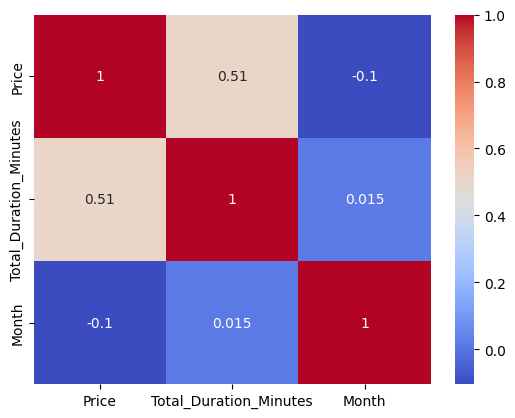

In [ ]:
sub_matriks_1 = transformed_data[['Price', 'Total_Duration_Minutes', 'Month']]
# sub_matriks_1 = transformed_data[['Price', 'Total_Duration_Minutes']]
correlation = sub_matriks_1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# nilai korelasi 0,51 menunjukkan bahwa ketika total durasi penerbangan meningkat maka harga tiket juga meningkat

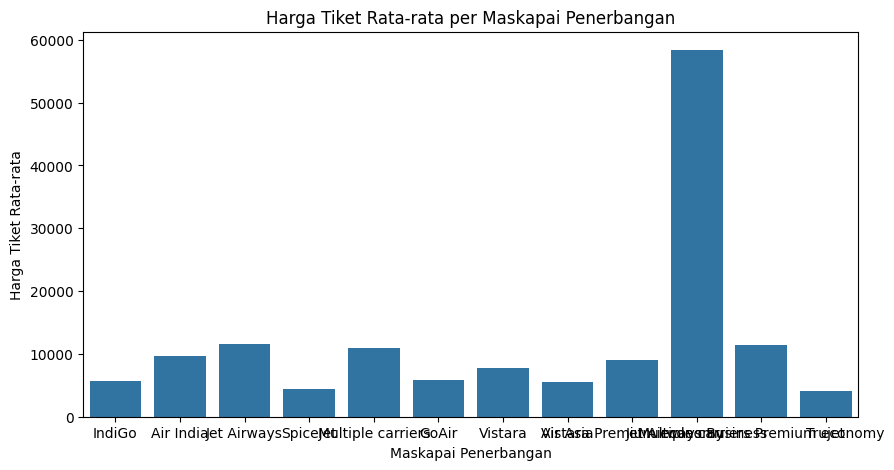

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=transformed_data, x="Airline", y="Price", ci=None)
plt.title('Harga Tiket Rata-rata per Maskapai Penerbangan')
plt.xlabel('Maskapai Penerbangan')
plt.ylabel('Harga Tiket Rata-rata')
plt.show()


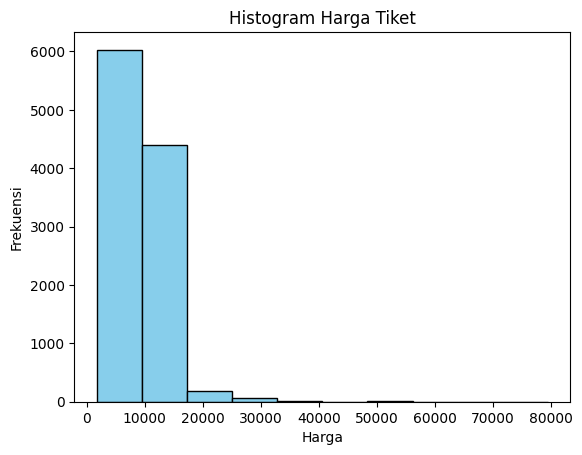

In [ ]:
plt.hist(data['Price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.title('Histogram Harga Tiket')
plt.show()